In [2]:
import requests
import json
import pandas as pd
from config import api_key
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy.stats import linregress

In [3]:
#base URL
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

#Set parameters
start_year = '2013'
end_year = '2021'
series_id = 'CUUR0000SA0'

#API call to get the data
headers = {'Content-type': 'application/json'}
data = json.dumps({'seriesid': [series_id],'startyear':start_year, 'endyear':end_year})
response = requests.post(url, data=data, headers=headers)
cpi_data = json.loads(response.text)
cpi_data

{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 221,
 'message': [],
 'Results': {'series': [{'seriesID': 'CUUR0000SA0',
    'data': [{'year': '2021',
      'period': 'M06',
      'periodName': 'June',
      'latest': 'true',
      'value': '271.696',
      'footnotes': [{}]},
     {'year': '2021',
      'period': 'M05',
      'periodName': 'May',
      'value': '269.195',
      'footnotes': [{}]},
     {'year': '2021',
      'period': 'M04',
      'periodName': 'April',
      'value': '267.054',
      'footnotes': [{}]},
     {'year': '2021',
      'period': 'M03',
      'periodName': 'March',
      'value': '264.877',
      'footnotes': [{}]},
     {'year': '2021',
      'period': 'M02',
      'periodName': 'February',
      'value': '263.014',
      'footnotes': [{}]},
     {'year': '2021',
      'period': 'M01',
      'periodName': 'January',
      'value': '261.582',
      'footnotes': [{}]},
     {'year': '2020',
      'period': 'M12',
      'periodName': 'December',
      'valu

In [6]:
#Preparing the lists which will go to the DataFrame 
Year = []
Month = []
CPI_value = []

#Extracting the values from the API response
for series in cpi_data['Results']['series']:
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        Year.append(year)
        period = item['period']
        Month.append(period)
        value = item['value']
        CPI_value.append(value)

#Creating the DataFrame        
CPI_data_df = pd.DataFrame({'Year':Year,'Month':Month,'CPI Value':CPI_value})  

#Renaming month values
CPI_data_df['Month'] = CPI_data_df['Month'].replace(
    {'M01':'Jan',
     'M02':'Feb',
     'M03':'Mar',
     'M04':'Apr',
     'M05':'May',
     'M06':'Jun',
     'M07':'Jul',
     'M08':'Aug',
     'M09':'Sep',
     'M10':'Oct',
     'M11':'Nov',
     'M12':'Dec'
    })        

#Saving the data to output_data folder (as csv file)
CPI_data_df.to_csv('./output_data/CPI_data.csv',index=False)

In [5]:
#Converting our str values from 'Year' & 'Month' columns to create dates in mm-dd-yyyy format (added days as 1st day of the month)
#Need this format for plotting CPI data on the graph
year_list = CPI_data_df['Year'].tolist()
month_list = CPI_data_df['Month'].tolist()
date_list = []
for index in range(len(year_list)):
    date_str = month_list[index] + ' 1 ' + year_list[index]
    date_input = datetime.strptime(date_str,'%b %d %Y')
    date_list.append(date_input)

#Reversed my data to start from earliest dates to latest
date_list.reverse()


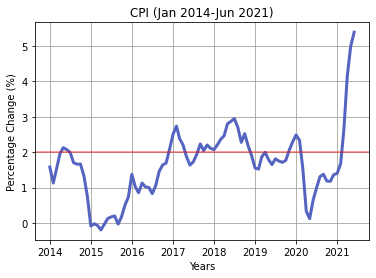

In [18]:
#Get the list of CPI values
CPI_data_list = CPI_data_df['CPI Value'].tolist()

#Get the lists for calculating percentage change
CPI_percentage_current = CPI_data_list[:len(CPI_data_list)-12]
CPI_percentage_previous = CPI_data_list[12:]

#Result list of the percentage change (months)
CPI_percentage_YoY = []

#Getting the values for 'CPI_percentage_YoY' list
for index in range(len(CPI_percentage_previous)):
    a = float(CPI_percentage_current[index])
    b = float(CPI_percentage_previous[index])
    percentage_change = ((a / b)- 1) * 100
    CPI_percentage_YoY.append(percentage_change)

#Reversing the CPI percentage values to start from earliest dates to latest
CPI_percentage_YoY.reverse()
CPI_percentage = CPI_percentage_YoY

#Extracting the data to start from Jan 2014 to Jun 2021
new_date_list = date_list[12:]

#Plotting Line Graph
plt.plot(new_date_list, CPI_percentage, linewidth=3, color='#5464C0')

#Adding grid lines for better readability 
plt.grid(color='#9FA095', alpha=1)

#Putting horizontal line to show acceptable inflation rate, which is around 2% or a bit below (I plotted the line at 2%)
plt.axhline(y=2, color='r',linestyle='-', alpha=0.5)

#Plotting Title and x/y labels
plt.title('CPI (Jan 2014-Jun 2021)')
plt.xlabel('Years')
plt.ylabel('Percentage Change (%)')

# Save and display the chart
plt.savefig('output_data/cpi_percent_change_visual.png')
plt.show()



## Observation:



In [16]:
# The path to our car manuf. stock CSV file
stok_prices_file = "output_data/carstockprices.csv"

# Read our carstockprices.csv data into pandas
Car_Stock_df = pd.read_csv(stok_prices_file)
Car_Stock_df.head()

,Date,Open,High,Low,Close,Volume,Ticker
0,2014-01-02,10.930932,10.952198,10.831689,10.945109,31528500,F
1,2014-01-03,11.001821,11.086886,10.845867,10.994732,46122300,F
2,2014-01-06,11.143596,11.171951,11.001820,11.044353,42657600,F
3,2014-01-07,11.150682,11.157771,10.881308,10.902575,54476300,F
4,2014-01-08,11.058531,11.136508,10.994732,11.015998,48448300,F


In [17]:
Ford_df = Car_Stock_df.loc[Car_Stock_df['Ticker']=='TM',:]
Ford_df.head()

,Date,Open,High,Low,Close,Volume,Ticker
1887,2014-01-02,111.058873,111.058873,109.688904,110.172958,239400,TM
1888,2014-01-03,110.510884,110.775745,109.478842,110.063362,530500,TM
1889,2014-01-06,110.401282,110.492619,109.597569,109.752831,441100,TM
1890,2014-01-07,109.953761,110.136421,109.588434,110.017693,306200,TM
1891,2014-01-08,109.761966,109.761966,109.277911,109.460571,349400,TM


In [211]:
Ford_Close_df = Ford_df[['Date','Close']]
Ford_Close_df

,Date,Close
1887,2014-01-02,110.172958
1888,2014-01-03,110.063362
1889,2014-01-06,109.752831
1890,2014-01-07,110.017693
1891,2014-01-08,109.460571
...,...,...
3769,2021-06-24,177.669998
3770,2021-06-25,178.100006
3771,2021-06-28,177.070007
3772,2021-06-29,176.729996


In [212]:


#date_input = datetime.strptime(date_str,'%b %d %Y')
date_list = []
month_list = []
year_list = []
for index in Ford_Close_df.index:
    date_str = Ford_Close_df['Date'][index]
    year_list.append(date_str[0:4])
    month_list.append(date_str[5:7])

    #     date_input = datetime.strptime(date_str,'%Y-%m-%d')
#     date_list.append(date_input)
Ford_Close_df['Year']= year_list
Ford_Close_df['Month']= month_list
Ford_Close_df.head()

<ipython-input-212-1bde93121993>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ford_Close_df['Year']= year_list
<ipython-input-212-1bde93121993>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ford_Close_df['Month']= month_list


,Date,Close,Year,Month
1887,2014-01-02,110.172958,2014,01
1888,2014-01-03,110.063362,2014,01
1889,2014-01-06,109.752831,2014,01
1890,2014-01-07,110.017693,2014,01
1891,2014-01-08,109.460571,2014,01


In [219]:
Ford_CPI_Close_df = Ford_Close_df.groupby(['Year','Month']).mean()
percentage_change_Ford = [0]
for index in range(1,len(Ford_CPI_Close_df['Close'])):
    percentage_change_Ford.append(((Ford_CPI_Close_df['Close'][index]/Ford_CPI_Close_df['Close'][index-1])-1)*100)
    
Ford_CPI_Close_df['CPI'] = CPI_percentage
Ford_CPI_Close_df['% Change'] = percentage_change_Ford
Ford_CPI_Close_df.head()


Close       CPI  % Change
Year Month                                
2014 01     108.879097  1.578947  0.000000
     02     105.789537  1.126349 -2.837606
     03     101.915947  1.512203 -3.661600
     04     100.966650  1.952858 -0.931450
     05     101.971587  2.127112  0.995316

In [214]:
#Defining a general function to create Linear Regression Plots
def plot_linear_regression(x_values, y_values, x_line_eq, y_line_eq, x_label, y_label):
    
    #Perform  Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
    
    #Get regression values
    regress_values = [i * slope + intercept for i in x_values]
    
    #Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Create Scatter Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    #Displaying equation on the plot
    plt.annotate(line_eq,(x_line_eq, y_line_eq),fontsize=15,color="red")
    
    #Labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    #Printing r-values
    print(f'The r-value is: {rvalue**2}')

The r-value is: 0.014541006969096635


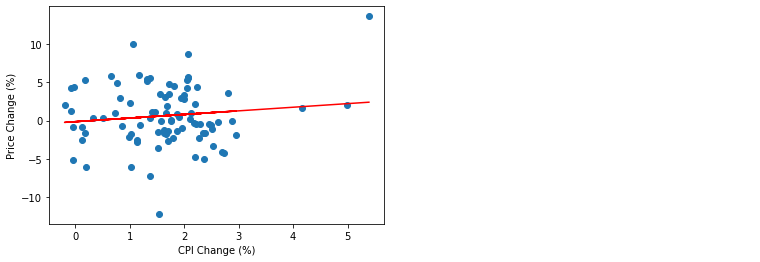

In [215]:
a = Ford_CPI_Close_df['CPI'].tolist()
b = Ford_CPI_Close_df['Close'].tolist()
c = Ford_CPI_Close_df['% Change'].tolist()

plot_linear_regression(a, c, 10, 0,'CPI Change (%)', 'Price Change (%)')

In [229]:
# The path to our car manuf. stock CSV file
stok_prices_file = "output_data/carstockprices.csv"

# Read our carstockprices.csv data into pandas
Car_Stock_df = pd.read_csv(stok_prices_file)
month_list = []
year_list = []
for index in Car_Stock_df.index:
    date_str = Car_Stock_df['Date'][index]
    year_list.append(date_str[0:4])
    month_list.append(date_str[5:7])

Car_Stock_df['Year'] = year_list
Car_Stock_df['Month'] = month_list

Car_Stock_Month_df = Car_Stock_df.groupby(['Ticker','Year','Month']).mean()
del Car_Stock_Month_df['Open']
del Car_Stock_Month_df['High']
del Car_Stock_Month_df['Low']
del Car_Stock_Month_df['Volume']


test = Car_Stock_Month_df.loc[Car_Stock_Month_df['Ticker']=='DDAIF',:]

KeyError: 'Ticker'